 Przypomnijmy definicje.
 
 Niech $a,b\in\mathbb{R}$ takie,że $4a^3+27b^2 \neq0$. Nieosobliwą krzywą eliptyczną nazywamy zbiór $\mathcal{E}$ rozwiązań $(x,y)\in\mathbb{R}^2$ równania $$y^2 = x^3 + ax + b$$
wraz ze specjalnym punktem $\mathcal{O}$ nazywanym punktem w nieskończoności 

Poniższy notatnik napisany w środowisku obliczeniowym SageMath obrazuje działanie grupy $(\mathcal{E},+)$, gdzie $\mathcal{E}$ to nieosobliwa krzywa eliptyczna nad ciałem liczb rzeczywistych.

In [1]:
from sage.all import *

Funkcja budująca krzywą eliptyczną:

In [2]:
def make_curve(a,b):


    Delta=4*a^3+27*b^2

    print(f"Wyróżnik Δ = {Delta}")

    if Delta == 0:
        raise ValueError(f"Dla a={a}, b={b}: wyróżnik Δ=0 — krzywa jest osobliwa.")
    else:
        E=EllipticCurve(SR,[a,b])
        print("Krzywa eliptyczna E:",E)
    return E


In [3]:
a,b=-2,0

In [4]:
Curve=make_curve(a,b)

Wyróżnik Δ = -32
Krzywa eliptyczna E: Elliptic Curve defined by y^2 = x^3 + (-2)*x over Symbolic Ring


Możemy też sprawdzić nieosobliwość krzywej metodą 'is_singilar()' z Sage.

In [5]:
print("Czy E jest osobliwa wg Sage?", Curve.is_singular())

verbose 0 (4200: multi_polynomial_ideal.py, groebner_basis) Warning: falling back to very slow toy implementation.
verbose 0 (1163: multi_polynomial_ideal.py, dimension) Warning: falling back to very slow toy implementation.
Czy E jest osobliwa wg Sage? False


Rysujemy naszą krzywą:

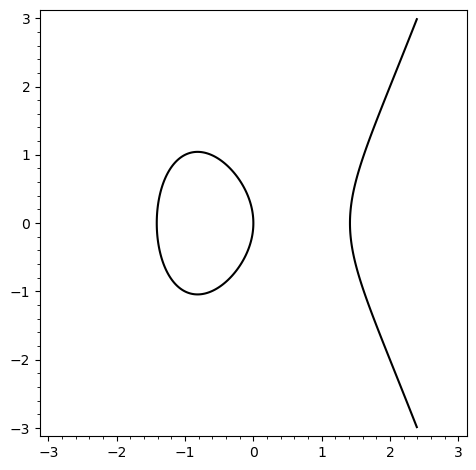

In [6]:
xmin, xmax = -3,3
ymin, ymax = -3, 3

curve_plot = implicit_plot(lambda x,y: y**2 - (x**3 + float(a)*x + float(b)),
                           (xmin,xmax), (ymin,ymax), plot_points=400, color='black')
#x_axis = line([(xmin,0),(xmax,0)], )
#y_axis = line([(0,ymin),(0,ymax)], )

#show(curve_plot + x_axis + y_axis)
show(curve_plot)

Spróbujmy innych parametrów.

Wyróżnik Δ = 23
Krzywa eliptyczna E: Elliptic Curve defined by y^2 = x^3 + (-1)*x + 1 over Symbolic Ring


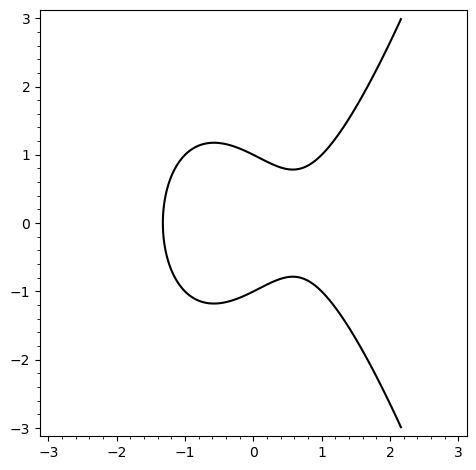

In [7]:
a,b=-1,1
Curve=make_curve(a,b)
curve_plot = implicit_plot(lambda x,y: y**2 - (x**3 + float(a)*x + float(b)),
                           (xmin,xmax), (ymin,ymax), plot_points=400, color='black')
show(curve_plot)

Wyróżnik Δ = -1264
Krzywa eliptyczna E: Elliptic Curve defined by y^2 = x^3 + (-7)*x + 2 over Symbolic Ring


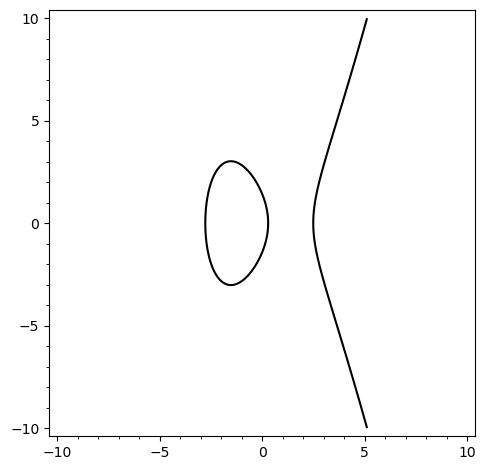

In [8]:
xmin, xmax = -10,10
ymin, ymax = -10, 10

a,b=-7,2
Curve=make_curve(a,b)
curve_plot = implicit_plot(lambda x,y: y**2 - (x**3 + float(a)*x + float(b)),
                           (xmin,xmax), (ymin,ymax), plot_points=400, color='black')
show(curve_plot)

Definiujemy funkcje budującą punkt na krzywej E o danej współrzędnej x.

In [9]:
def point_from_x(E,x,sign=+1):
    K = E.base_ring()   # pobieramy pole krzywej
    a=E.a4()
    b=E.a6()
    f=x**3+a*x+b
    if f<0:
        raise ValueError("Brak rzeczywistego punktu dla tego x")
    y = K(sqrt(f))
    x=  K(x)      # rzutujemy na to samo pole
    if sign<0:
        y=-y
    return E([x,y])

Wybierzmy (uważnie) przykładowe punkty:

In [10]:
Curve = make_curve(-2,0)
P = point_from_x(Curve, -1)
Q = point_from_x(Curve, 3/2)

print("P =", P)
print("Q =", Q)
print("Czy P leży na krzywej?", bool(Curve.is_on_curve(P[0], P[1])))
print("Czy Q leży na krzywej?", bool(Curve.is_on_curve(Q[0], Q[1])))



Wyróżnik Δ = -32
Krzywa eliptyczna E: Elliptic Curve defined by y^2 = x^3 + (-2)*x over Symbolic Ring
P = (-1 : 1 : 1)
Q = (3/2 : 1/2*sqrt(3/2) : 1)
Czy P leży na krzywej? True
Czy Q leży na krzywej? True


Dodawanie punktów i jego ilustracja:

In [11]:
R=P+Q
print("P+Q = ",R)

P+Q =  (1/25*(sqrt(3/2) - 2)^2 - 1/2 : -1/250*(2*(sqrt(3/2) - 2)^2 + 25)*(sqrt(3/2) - 2) - 1 : 1)


In [12]:
def plot_point_add(Curve,P,Q,figsize=[7,7]):

    a, b = Curve.a_invariants()[3], Curve.a_invariants()[4]

    x1_float=float(P[0])
    y1_float=float(P[1])
    x2_float=float(Q[0])
    y2_float=float(Q[1])

    R_is_O=False

    if P!=Q:
        if x1_float==x2_float:
            R_is_O=True
            slope=float('inf')
            x3=x1_float
            y3=y1_float
            print("Punkty są wzajemnie odwrotne (P = -Q).")
            print("Suma P + Q = O (punkt w nieskończoności)") 
        else:
            slope=(y2_float-y1_float)/(x2_float-x1_float)
            x3=slope**2-x1_float-x2_float
            y3=slope*(x1_float-x3)-y1_float
    else:
            if y1_float==0:
                R_is_O=True
                slope=float('inf')
                x3=x1_float
                y3=y1_float
                print(f"Podwajanie punktu P = ({x1_float}, 0), który ma rząd 2.")
                print("Styczna jest pionowa. Suma 2P = O (punkt w nieskończoności)")
            else:
                slope=(3*x1_float**2+float(a))/(2*y1_float)
                x3 = slope**2 - 2 * x1_float
                y3 = slope*(x1_float - x3) - y1_float

    # skalowanie osi 
    x_coords = [x1_float, x2_float]
    y_coords = [y1_float, y2_float]
    if not R_is_O:
        x_coords.append(x3)
        y_coords.extend([y3, -y3])
    x_coords.extend([-2, 2]) 
    y_coords.extend([-2, 2])

    padding_x = (max(x_coords) - min(x_coords)) * 0.1 + 2 
    padding_y = (max(y_coords) - min(y_coords)) * 0.1 + 2 
    xmin = min(x_coords) - padding_x
    xmax = max(x_coords) + padding_x
    ymin = min(y_coords) - padding_y
    ymax = max(y_coords) + padding_y
        

    curve_plot = implicit_plot(lambda x,y: y**2 - (x**3 + float(a)*x + float(b)),
                            (xmin,xmax), (ymin,ymax), plot_points=400, color='black')  
                    
    plot_P = point((x1_float,y1_float), color='blue', size=30) + text('P', (x1_float,y1_float+0.3), color='blue', fontsize=10)
    plot_Q = point((x2_float,y2_float), color='green', size=30) + text('Q', (x2_float,y2_float+0.3), color='green', fontsize=10)

    # Inicjujemy puste obiekty graficzne
    plot_S = Graphics()
    plot_R = Graphics()


    if not R_is_O:
        plot_S = point((x3,y3), color='orange', size=30) + text('R', (x3,y3+0.3), color='orange', fontsize=10)
        plot_R = point((x3,-y3), color='red', size=30) + text('S', (x3,-y3+0.3), color='red', fontsize=10)
    else:
        plot_R = text("R = O (Punkt w Nieskończoności)", (xmin + 0.5, ymax - 0.5), color='red', fontsize=12) 
    
    line_plot = Graphics()
    m_line = Graphics()
    
    if slope == float('inf'):
        line_plot = line([(x1_float, ymin), (x1_float, ymax)], color='gray', linestyle='--') 
    else:
        line_plot = plot(lambda x: slope*(x - x1_float) + y1_float, (xmin, xmax), color='gray', linestyle='--') 
        if not R_is_O:
            m_line = line([(x3,y3),(x3,-y3)], color='red',linestyle=':')
    (curve_plot + plot_P + plot_Q + line_plot + plot_S + m_line + plot_R).show(figsize=figsize)

Ilustracja dodawania punktów w różnych przypadkach:

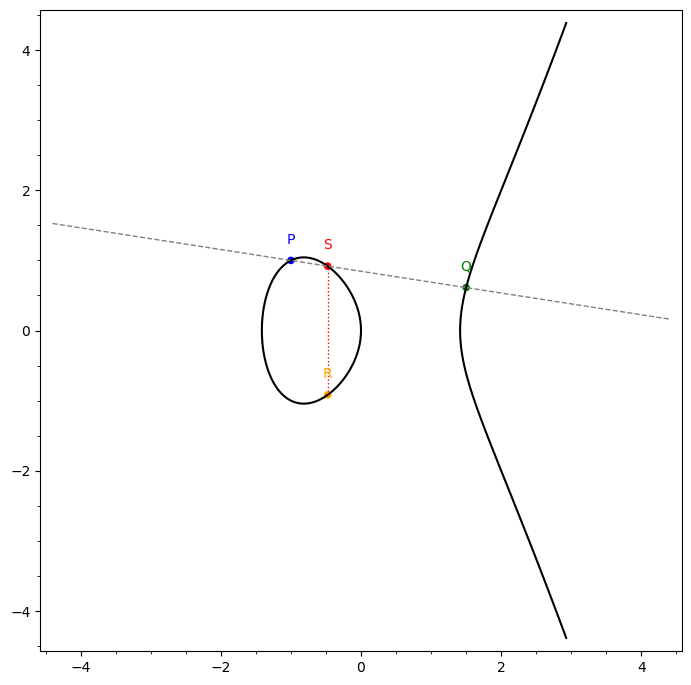

In [64]:
P1 = point_from_x(Curve, -1)
Q1 = point_from_x(Curve, 3/2)
plot_point_add(Curve, P1, Q1)


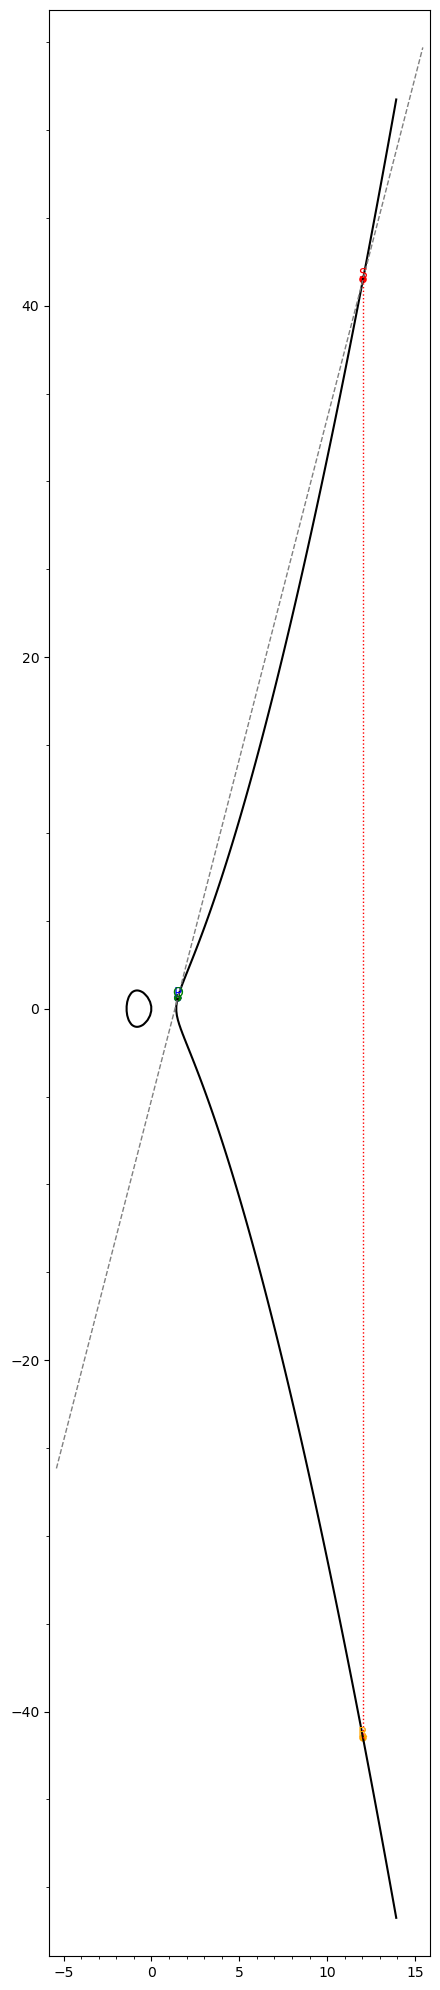

In [13]:
P2 = point_from_x(Curve, 1.5)
Q2 = P2
plot_point_add(Curve, P2, Q2,[5,20])

Punkty są wzajemnie odwrotne (P = -Q).
Suma P + Q = O (punkt w nieskończoności)


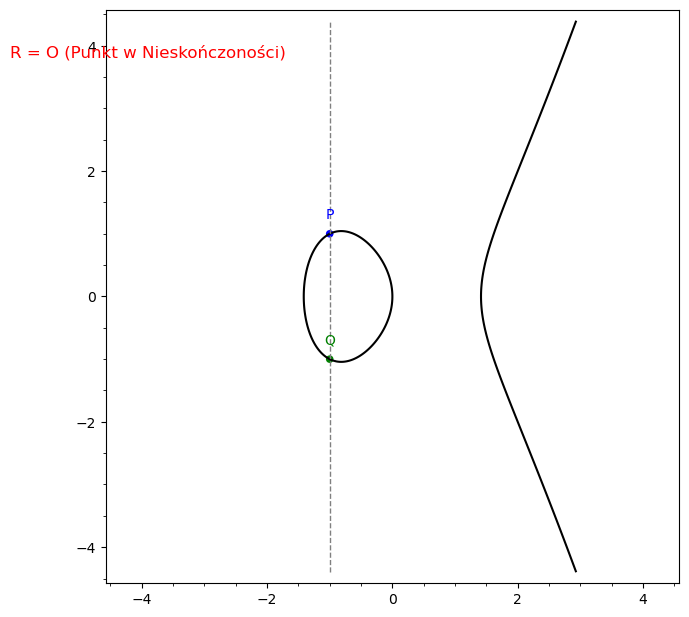

In [14]:
P3 = point_from_x(Curve, -1, sign=+1)
Q3 = point_from_x(Curve, -1, sign=-1)
plot_point_add(Curve, P3, Q3)

Podwajanie punktu P = (1.4142135623730951, 0), który ma rząd 2.
Styczna jest pionowa. Suma 2P = O (punkt w nieskończoności)


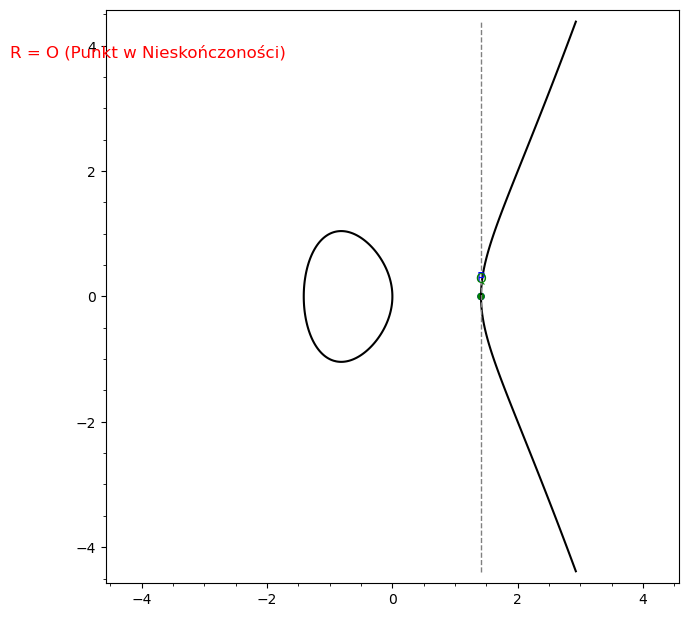

In [15]:
P4 = point_from_x(Curve, sqrt(2))
Q4 = P4
plot_point_add(Curve, P4, Q4)